## 구성종목들

In [3]:
import requests

In [8]:

headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36'}

In [9]:
URL = 'https://m.stock.naver.com/api/index/KOSPI/enrollStocks'

In [10]:
# 비동기 방식
params = {
    'pagesize' : 20,
    'page' : 1,
    'type' : 'object'
    }

In [12]:
response = requests.get(URL, params=params,headers=headers)

In [14]:
response.status_code

200

In [16]:
type(response.text)

str

In [18]:
import json

In [19]:
json_result = json.loads(response.text)

In [20]:
type(json_result)

dict

In [21]:
composition_list = []

for data in json_result['stocks']:
    composition_list.append({
        '종목': data['stockName'],
        '시세': data['closePrice'],
        '등락률': data['fluctuationsRatio'],
        '시가총액(억)': data['marketValue'],
        '거래량(백만)': data['accumulatedTradingVolume']        
    })

In [22]:
composition_list = []

for i in range(1,101):
    print('현재 파라미터', params)
    params = {
    'pagesize' : 20,
    'page' : i,
    'type' : 'object'
    }
    print(f'현재 {i}페이지 진행 중입니다.')
    
    response = requests.get(URL, params=params, headers=headers)
    json_result = json.loads(response.text)

    
    for data in json_result['stocks']:
        composition_list.append({
            '종목': data['stockName'],
            '시세': data['closePrice'],
            '등락률': data['fluctuationsRatio'],
            '시가총액': data['marketValue'],
            '거래량': data['accumulatedTradingVolume'] 
        })
        
composition_list

현재 파라미터 {'pagesize': 20, 'page': 1, 'type': 'object'}
현재 1페이지 진행 중입니다.
현재 파라미터 {'pagesize': 20, 'page': 1, 'type': 'object'}
현재 2페이지 진행 중입니다.
현재 파라미터 {'pagesize': 20, 'page': 2, 'type': 'object'}
현재 3페이지 진행 중입니다.
현재 파라미터 {'pagesize': 20, 'page': 3, 'type': 'object'}
현재 4페이지 진행 중입니다.
현재 파라미터 {'pagesize': 20, 'page': 4, 'type': 'object'}
현재 5페이지 진행 중입니다.
현재 파라미터 {'pagesize': 20, 'page': 5, 'type': 'object'}
현재 6페이지 진행 중입니다.
현재 파라미터 {'pagesize': 20, 'page': 6, 'type': 'object'}
현재 7페이지 진행 중입니다.
현재 파라미터 {'pagesize': 20, 'page': 7, 'type': 'object'}
현재 8페이지 진행 중입니다.
현재 파라미터 {'pagesize': 20, 'page': 8, 'type': 'object'}
현재 9페이지 진행 중입니다.
현재 파라미터 {'pagesize': 20, 'page': 9, 'type': 'object'}
현재 10페이지 진행 중입니다.
현재 파라미터 {'pagesize': 20, 'page': 10, 'type': 'object'}
현재 11페이지 진행 중입니다.
현재 파라미터 {'pagesize': 20, 'page': 11, 'type': 'object'}
현재 12페이지 진행 중입니다.
현재 파라미터 {'pagesize': 20, 'page': 12, 'type': 'object'}
현재 13페이지 진행 중입니다.
현재 파라미터 {'pagesize': 20, 'page': 13, 'type': 'object'}
현재 14페이지 진행 중입니

[{'종목': '삼성전자',
  '시세': '60,300',
  '등락률': '-1.63',
  '시가총액': '3,599,779',
  '거래량': '7,794,328'},
 {'종목': 'LG에너지솔루션',
  '시세': '507,000',
  '등락률': '-0.78',
  '시가총액': '1,186,380',
  '거래량': '176,709'},
 {'종목': 'SK하이닉스',
  '시세': '89,300',
  '등락률': '-1.87',
  '시가총액': '650,106',
  '거래량': '1,248,864'},
 {'종목': '삼성바이오로직스',
  '시세': '770,000',
  '등락률': '-1.66',
  '시가총액': '548,040',
  '거래량': '34,995'},
 {'종목': 'LG화학',
  '시세': '655,000',
  '등락률': '-2.09',
  '시가총액': '462,380',
  '거래량': '120,398'},
 {'종목': '삼성SDI',
  '시세': '673,000',
  '등락률': '-1.03',
  '시가총액': '462,785',
  '거래량': '115,147'},
 {'종목': '삼성전자우',
  '시세': '53,700',
  '등락률': '-1.47',
  '시가총액': '441,890',
  '거래량': '450,136'},
 {'종목': '현대차',
  '시세': '172,500',
  '등락률': '-0.81',
  '시가총액': '364,892',
  '거래량': '291,325'},
 {'종목': 'NAVER',
  '시세': '206,000',
  '등락률': '-0.96',
  '시가총액': '337,941',
  '거래량': '680,621'},
 {'종목': '기아',
  '시세': '75,500',
  '등락률': '0.27',
  '시가총액': '306,049',
  '거래량': '566,137'},
 {'종목': '카카오',
  '시세': '61,400',
  '등락

In [23]:
import pandas as pd

In [25]:
df=pd.DataFrame(composition_list)

In [26]:
df.to_csv('composition.csv', index=False)

## 일별시세량

In [27]:
import requests

In [28]:
from bs4 import BeautifulSoup

In [29]:
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36'}

In [30]:
URL = 'https://m.stock.naver.com/api/index/KOSPI/price'

In [31]:
params = {
    'pagesize':10,
    'page' : 1
    }

In [32]:
response = requests.get(URL, params=params,headers=headers)

In [33]:
response.status_code

200

In [34]:
type(response.text)

str

In [35]:
import json

In [36]:
json_result = json.loads(response.text)

In [37]:
type(json_result)

list

##### 결과 출력

In [38]:
json_result

[{'localTradedAt': '2023-02-27',
  'closePrice': '2,394.43',
  'compareToPreviousClosePrice': '-29.18',
  'compareToPreviousPrice': {'code': '5', 'text': '하락', 'name': 'FALLING'},
  'fluctuationsRatio': '-1.20',
  'openPrice': '2,405.42',
  'highPrice': '2,405.56',
  'lowPrice': '2,383.76'},
 {'localTradedAt': '2023-02-24',
  'closePrice': '2,423.61',
  'compareToPreviousClosePrice': '-15.48',
  'compareToPreviousPrice': {'code': '5', 'text': '하락', 'name': 'FALLING'},
  'fluctuationsRatio': '-0.63',
  'openPrice': '2,442.49',
  'highPrice': '2,452.97',
  'lowPrice': '2,421.47'},
 {'localTradedAt': '2023-02-23',
  'closePrice': '2,439.09',
  'compareToPreviousClosePrice': '21.41',
  'compareToPreviousPrice': {'code': '2', 'text': '상승', 'name': 'RISING'},
  'fluctuationsRatio': '0.89',
  'openPrice': '2,430.01',
  'highPrice': '2,449.62',
  'lowPrice': '2,422.62'},
 {'localTradedAt': '2023-02-22',
  'closePrice': '2,417.68',
  'compareToPreviousClosePrice': '-41.28',
  'compareToPrevious

##### 분류 값 삽입

In [39]:
price_list = []

for data in json_result:
    price_list.append({
        '날짜': data['localTradedAt'],
        '종가': data['closePrice'],
        '전일대비': data['compareToPreviousClosePrice'],
        '등락률' : data['fluctuationsRatio'],
        '시가' : data['openPrice'],
        '고가' : data['highPrice'],
        '저가' : data['lowPrice']
    })
    
price_list

[{'날짜': '2023-02-27',
  '종가': '2,394.43',
  '전일대비': '-29.18',
  '등락률': '-1.20',
  '시가': '2,405.42',
  '고가': '2,405.56',
  '저가': '2,383.76'},
 {'날짜': '2023-02-24',
  '종가': '2,423.61',
  '전일대비': '-15.48',
  '등락률': '-0.63',
  '시가': '2,442.49',
  '고가': '2,452.97',
  '저가': '2,421.47'},
 {'날짜': '2023-02-23',
  '종가': '2,439.09',
  '전일대비': '21.41',
  '등락률': '0.89',
  '시가': '2,430.01',
  '고가': '2,449.62',
  '저가': '2,422.62'},
 {'날짜': '2023-02-22',
  '종가': '2,417.68',
  '전일대비': '-41.28',
  '등락률': '-1.68',
  '시가': '2,430.87',
  '고가': '2,435.98',
  '저가': '2,416.16'},
 {'날짜': '2023-02-21',
  '종가': '2,458.96',
  '전일대비': '3.84',
  '등락률': '0.16',
  '시가': '2,457.51',
  '고가': '2,466.07',
  '저가': '2,446.00'},
 {'날짜': '2023-02-20',
  '종가': '2,455.12',
  '전일대비': '3.91',
  '등락률': '0.16',
  '시가': '2,453.25',
  '고가': '2,463.17',
  '저가': '2,430.27'},
 {'날짜': '2023-02-17',
  '종가': '2,451.21',
  '전일대비': '-24.27',
  '등락률': '-0.98',
  '시가': '2,447.66',
  '고가': '2,471.51',
  '저가': '2,445.74'},
 {'날짜': '2023-02-16',

##### 총 12페이지까지 출력

In [65]:
price_list = []

for i in range(1, 13):
    print('현재 파라미터', params)
    params = {
        'pageSize' : 20,
        'page' : i,
    }
    print(f'현재 {i}페이지 진행 중...')
    
    response = requests.get(URL, params=params,headers=headers)
    json_result = json.loads(response.text)
    
    
    for data in json_result:
        price_list.append({
            '날짜': data['localTradedAt'],
            '종가': data['closePrice'],
            '전일대비': data['compareToPreviousClosePrice'],
            '등락률' : data['fluctuationsRatio'],
            '시가' : data['openPrice'],
            '고가' : data['highPrice'],
            '저가' : data['lowPrice']
        })
        
price_list

현재 파라미터 {'pageSize': 20, 'page': 13}
현재 1페이지 진행 중...
현재 파라미터 {'pageSize': 20, 'page': 1}
현재 2페이지 진행 중...
현재 파라미터 {'pageSize': 20, 'page': 2}
현재 3페이지 진행 중...
현재 파라미터 {'pageSize': 20, 'page': 3}
현재 4페이지 진행 중...
현재 파라미터 {'pageSize': 20, 'page': 4}
현재 5페이지 진행 중...
현재 파라미터 {'pageSize': 20, 'page': 5}
현재 6페이지 진행 중...
현재 파라미터 {'pageSize': 20, 'page': 6}
현재 7페이지 진행 중...
현재 파라미터 {'pageSize': 20, 'page': 7}
현재 8페이지 진행 중...
현재 파라미터 {'pageSize': 20, 'page': 8}
현재 9페이지 진행 중...
현재 파라미터 {'pageSize': 20, 'page': 9}
현재 10페이지 진행 중...
현재 파라미터 {'pageSize': 20, 'page': 10}
현재 11페이지 진행 중...
현재 파라미터 {'pageSize': 20, 'page': 11}
현재 12페이지 진행 중...


[{'날짜': '2023-02-27',
  '종가': '2,395.90',
  '전일대비': '-27.71',
  '등락률': '-1.14',
  '시가': '2,405.42',
  '고가': '2,405.56',
  '저가': '2,383.76'},
 {'날짜': '2023-02-24',
  '종가': '2,423.61',
  '전일대비': '-15.48',
  '등락률': '-0.63',
  '시가': '2,442.49',
  '고가': '2,452.97',
  '저가': '2,421.47'},
 {'날짜': '2023-02-23',
  '종가': '2,439.09',
  '전일대비': '21.41',
  '등락률': '0.89',
  '시가': '2,430.01',
  '고가': '2,449.62',
  '저가': '2,422.62'},
 {'날짜': '2023-02-22',
  '종가': '2,417.68',
  '전일대비': '-41.28',
  '등락률': '-1.68',
  '시가': '2,430.87',
  '고가': '2,435.98',
  '저가': '2,416.16'},
 {'날짜': '2023-02-21',
  '종가': '2,458.96',
  '전일대비': '3.84',
  '등락률': '0.16',
  '시가': '2,457.51',
  '고가': '2,466.07',
  '저가': '2,446.00'},
 {'날짜': '2023-02-20',
  '종가': '2,455.12',
  '전일대비': '3.91',
  '등락률': '0.16',
  '시가': '2,453.25',
  '고가': '2,463.17',
  '저가': '2,430.27'},
 {'날짜': '2023-02-17',
  '종가': '2,451.21',
  '전일대비': '-24.27',
  '등락률': '-0.98',
  '시가': '2,447.66',
  '고가': '2,471.51',
  '저가': '2,445.74'},
 {'날짜': '2023-02-16',

In [53]:
len(price_list)

260

##### 데이터 저장(json, xlsx

In [54]:
file = open("./dayprice.json", "w+")
file.write(json.dumps(price_list))

55047

In [55]:
import pandas as pd

df = pd.read_json("./dayprice.json")
writer = pd.ExcelWriter("dayprice.xlsx")
df.to_excel(writer, "sheet1")
writer.save()

##### 데이터 저장(csv)

In [56]:
import pandas as pd

In [57]:
df=pd.DataFrame(price_list)

In [62]:
df.to_csv('dayprice.csv', index=False)

##### 데이터 불러오기 (일별시세)

In [64]:
import pandas as pd
df=pd.read_csv('dayprice.csv' , sep=',',encoding='CP949')
df


,날짜,종가,전일대비,등락률,시가,고가,저가
0,2022-02-10,2771.93,3.08,0.11,2787.44,2788.27,2761.76
1,2022-02-11,2747.71,-24.22,-0.87,2739.14,2766.70,2735.08
2,2022-02-14,2704.48,-43.23,-1.57,2715.10,2724.72,2688.24
3,2022-02-15,2676.54,-27.94,-1.03,2712.45,2716.45,2665.47
4,2022-02-16,2729.68,53.14,1.99,2719.61,2730.43,2711.34
...,...,...,...,...,...,...,...
255,2023-02-21,2458.96,3.84,0.16,2457.51,2466.07,2446.00
256,2023-02-22,2417.68,-41.28,-1.68,2430.87,2435.98,2416.16
257,2023-02-23,2439.09,21.41,0.89,2430.01,2449.62,2422.62
258,2023-02-24,2423.61,-15.48,-0.63,2442.49,2452.97,2421.47


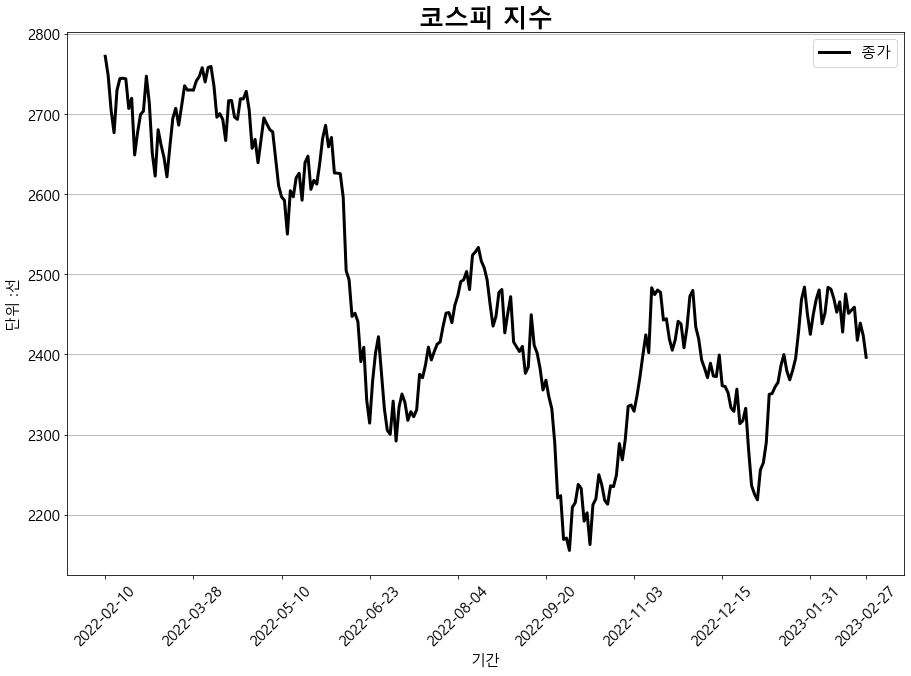

In [76]:
#종가 가격 비교 그래프 만들기
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic' # 폰트설정
plt.rcParams['font.size'] = 15 # 글자크기
plt.rcParams['axes.unicode_minus'] = False # 마이너스기호(-)가 깨지는 현상 방지

plt.figure(figsize=(15,10))
plt.plot(df['날짜'],df["종가"],color='black', linewidth = 3, label='종가')
plt.title('코스피 지수', color='black', fontsize=25, fontweight='bold') #제목 설정
plt.xticks([0,30,60,90,120,150,180,210,240,259],rotation=45) #x축에 날짜 설정
plt.xlabel("기간") # x 축에  기간 표시
plt.ylabel("단위 :선") # y 축에 기간 표시
plt.legend(loc="upper right") # 고가와 저가 범례 표시
plt.grid(axis='y') # y축에 줄 그어주기

In [45]:
#전일대비 등락이 -인 날과 +인 날을 구분하고 이어붙이기.

Under_0 = df[df.등락률<0]
Upper_0 = df[df.등락률>0]

df_join=Under_0.append(Upper_0, ignore_index=True)

df_join

,날짜,종가,전일대비,등락률,시가,고가,저가
0,2022-02-11,2747.71,-24.22,-0.87,2739.14,2766.70,2735.08
1,2022-02-14,2704.48,-43.23,-1.57,2715.10,2724.72,2688.24
2,2022-02-15,2676.54,-27.94,-1.03,2712.45,2716.45,2665.47
3,2022-02-21,2743.80,-0.72,-0.03,2706.65,2746.62,2694.90
4,2022-02-22,2706.79,-37.01,-1.35,2705.08,2721.84,2690.09
...,...,...,...,...,...,...,...
255,2023-02-14,2465.64,12.94,0.53,2471.33,2480.34,2459.83
256,2023-02-16,2475.48,47.58,1.96,2444.06,2475.99,2442.07
257,2023-02-20,2455.12,3.91,0.16,2453.25,2463.17,2430.27
258,2023-02-21,2458.96,3.84,0.16,2457.51,2466.07,2446.00


In [46]:
#일년간 코스피 지수가 전일대비 하락한 날
len(Under_0)

129

In [49]:
#1년간 코스피 지수가 전일대비 상승한 날
len(Upper_0)

131

In [50]:
print(Under_0.max())

날짜      2023-02-27
종가         2747.71
전일대비         -0.19
등락률          -0.01
시가         2745.85
고가          2766.7
저가         2735.08
dtype: object


In [52]:
#일별 고가와 저가 추출
df_3 = df[['날짜','고가','저가']]
df_3


,날짜,고가,저가
0,2022-02-10,2788.27,2761.76
1,2022-02-11,2766.70,2735.08
2,2022-02-14,2724.72,2688.24
3,2022-02-15,2716.45,2665.47
4,2022-02-16,2730.43,2711.34
...,...,...,...
255,2023-02-21,2466.07,2446.00
256,2023-02-22,2435.98,2416.16
257,2023-02-23,2449.62,2422.62
258,2023-02-24,2452.97,2421.47


In [53]:
# 고가와 저가간에 금액 차이를 파악
df['고가-저가 금액 차이']=df_3['고가']-df['저가']

df[['날짜','고가','저가','고가-저가 금액 차이']]


,날짜,고가,저가,고가-저가 금액 차이
0,2022-02-10,2788.27,2761.76,26.51
1,2022-02-11,2766.70,2735.08,31.62
2,2022-02-14,2724.72,2688.24,36.48
3,2022-02-15,2716.45,2665.47,50.98
4,2022-02-16,2730.43,2711.34,19.09
...,...,...,...,...
255,2023-02-21,2466.07,2446.00,20.07
256,2023-02-22,2435.98,2416.16,19.82
257,2023-02-23,2449.62,2422.62,27.00
258,2023-02-24,2452.97,2421.47,31.50


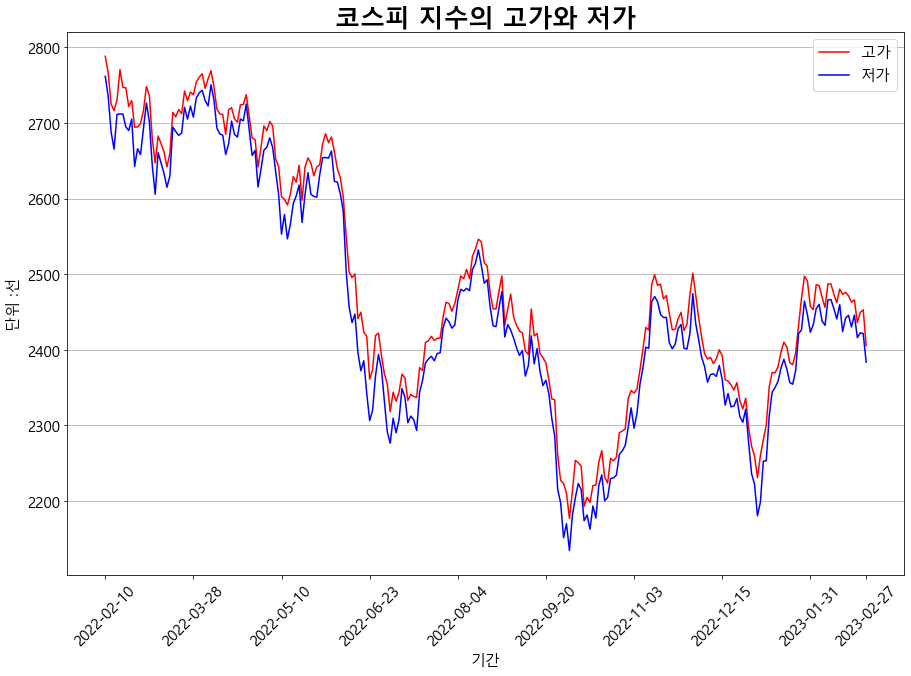

In [77]:
#그래프 확인
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic' # 폰트설정
plt.rcParams['font.size'] = 15 # 글자크기
plt.rcParams['axes.unicode_minus'] = False # 마이너스기호(-)가 깨지는 현상 방지

plt.figure(figsize=(15,10))
plt.plot(df['날짜'],df['고가'], color="red", label = "고가")
plt.plot(df['날짜'],df['저가'], color="blue", label = "저가")
plt.title('코스피 지수의 고가와 저가', color='black', fontsize=25, fontweight='bold') #제목 설정
plt.xticks([0,30,60,90,120,150,180,210,240,259],rotation=45) #x축에 날짜 설정
plt.xlabel("기간") # x 축에  기간 표시
plt.ylabel("단위 :선") # y 축에 기간 표시
plt.legend(loc="upper right") # 고가와 저가 범례 표시
plt.grid(axis='y') # y축에 줄 그어주기

##### 구성종목 불러오기

In [123]:
import pandas as pd
df=pd.read_csv('composition.csv' , sep=',')
df
# 2월 27일 기준

,종목,시세,등락률,시가총액,거래량
0,삼성전자,"60,300",-1.63,"3,599,779","7,794,328"
1,LG에너지솔루션,"507,000",-0.78,"1,186,380","176,709"
2,SK하이닉스,"89,300",-1.87,"650,106","1,248,864"
3,삼성바이오로직스,"770,000",-1.66,"548,040","34,995"
4,LG화학,"655,000",-2.09,"462,380","120,398"
...,...,...,...,...,...
1978,KBSTAR 200커뮤니케이션서비스,"11,470",-1.50,16,"5,502"
1979,KBSTAR 200생활소비재,"6,650",-1.48,15,153
1980,KBSTAR 200에너지화학,"10,405",-1.65,15,46
1981,KBSTAR 200산업재,"11,505",-0.95,12,"1,502"


In [128]:
%pip install PyMySQL

In [129]:
import pymysql